In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("BigBasket Products.csv")
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [3]:
df = df.drop(columns=["index"])

In [4]:
df

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...
27550,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [5]:
# Preprocessing
# Handling Missing Values
imputer = SimpleImputer(strategy='mean')  
df[['rating']] = imputer.fit_transform(df[['rating']]) 

In [6]:
# Handling missing values in the 'description' column
df['description'].fillna('No description available', inplace=True)

In [7]:
# Handling missing values in the 'product' column
df['product'].fillna('Unknown', inplace=True)

In [8]:
# Normalization/Scaling
scaler = StandardScaler()
df[['sale_price', 'market_price']] = scaler.fit_transform(df[['sale_price', 'market_price']])

In [9]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
         sale_price  market_price       rating
count  2.755500e+04  2.755500e+04  27555.00000
mean   7.948641e-17 -7.619865e-17      3.94341
std    1.000018e+00  1.000018e+00      0.61255
min   -6.582252e-01 -6.516134e-01      1.00000
25%   -4.678926e-01 -4.848666e-01      3.94341
50%   -2.725216e-01 -2.785818e-01      3.94341
75%    7.503315e-02  7.382129e-02      4.20000
max    2.504345e+01  2.083122e+01      5.00000


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


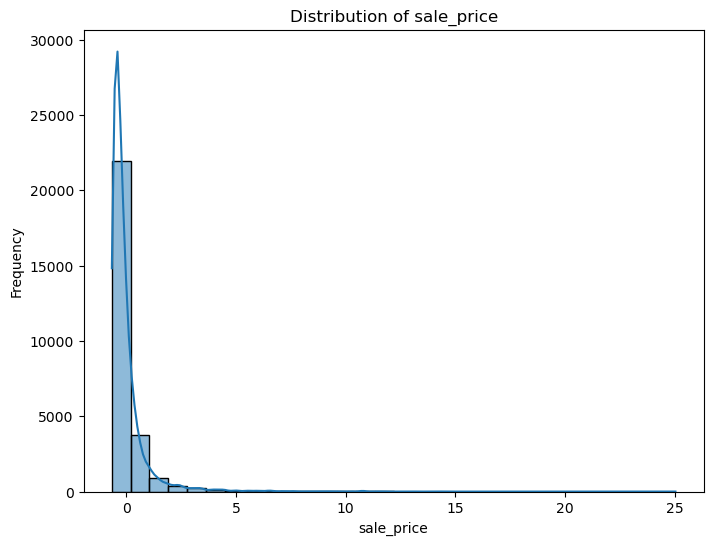

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


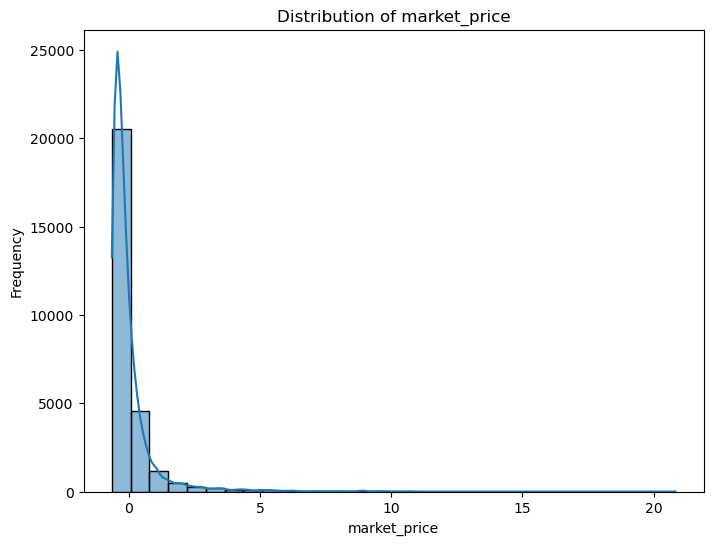

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


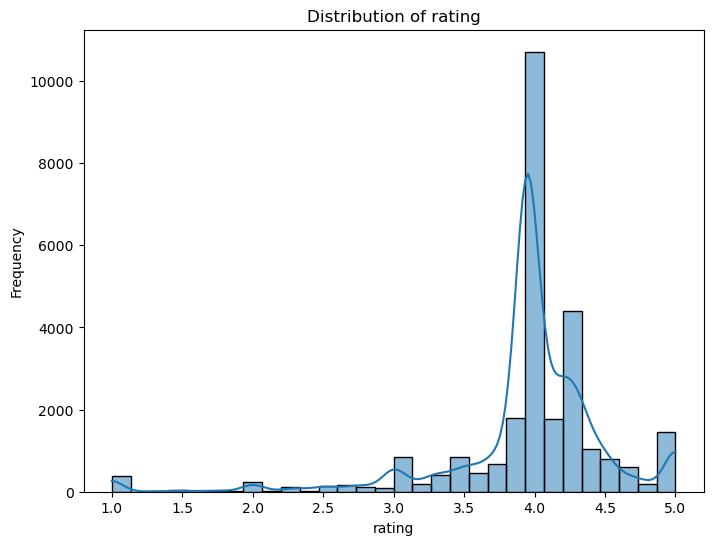

In [12]:
# Distribution of numerical features
numerical_features = ['sale_price', 'market_price', 'rating']  
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

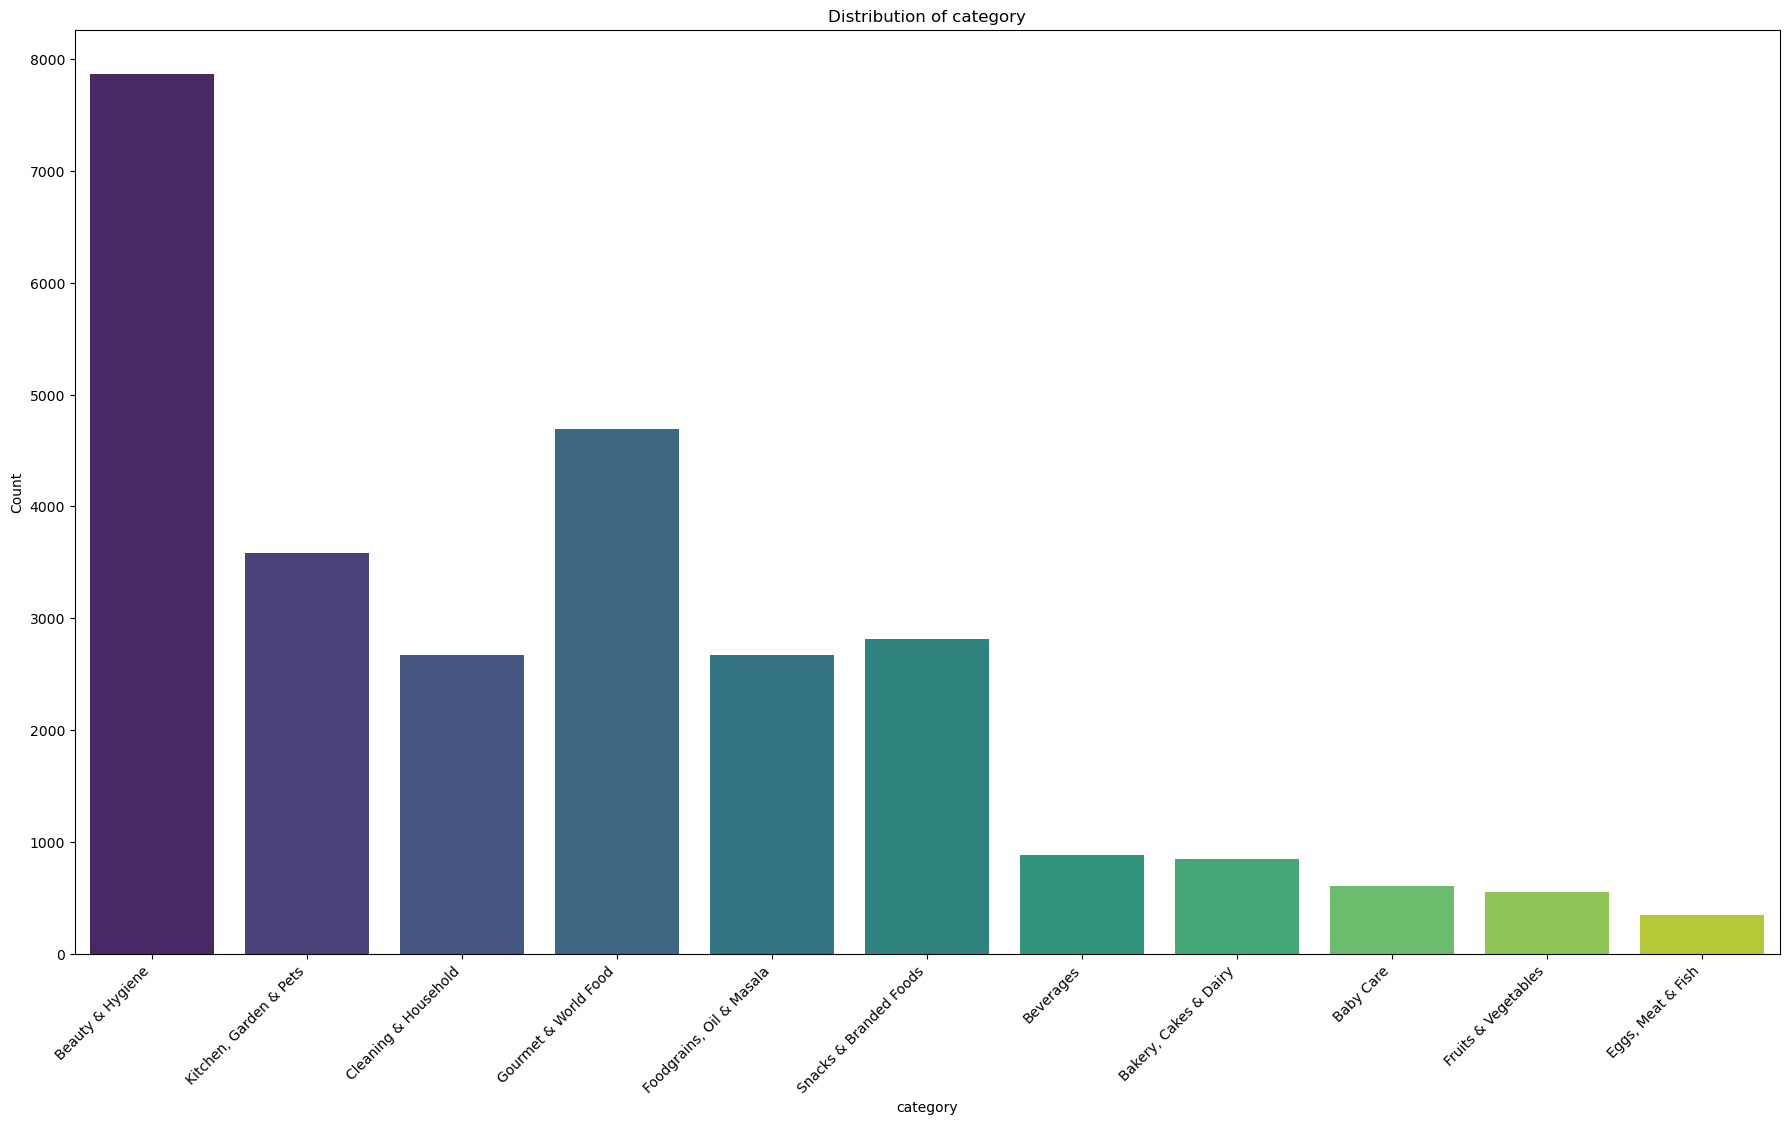

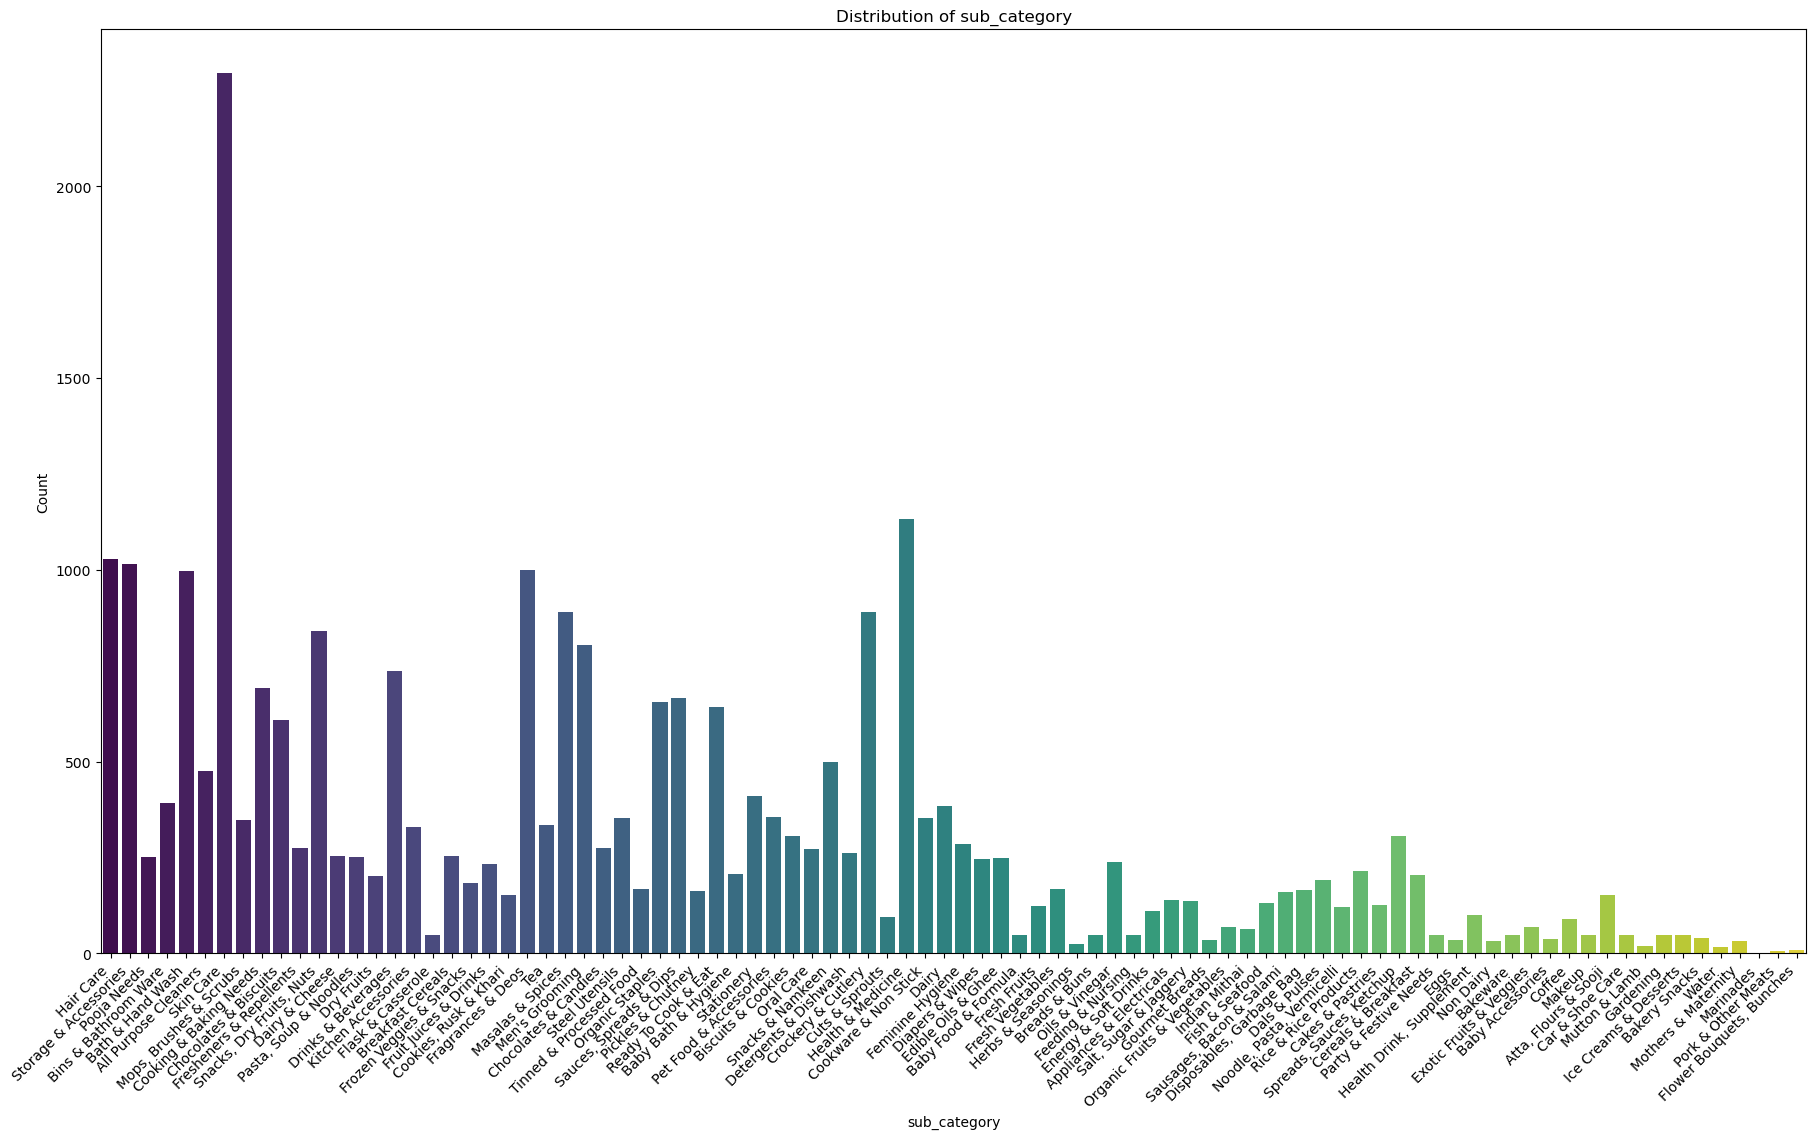

In [17]:
# Distribution of categorical features
categorical_features = ['category', 'sub_category']  
for feature in categorical_features:
    plt.figure(figsize=(22, 12))
    sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [20]:
# Analysis of 'description' column (word cloud)
text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


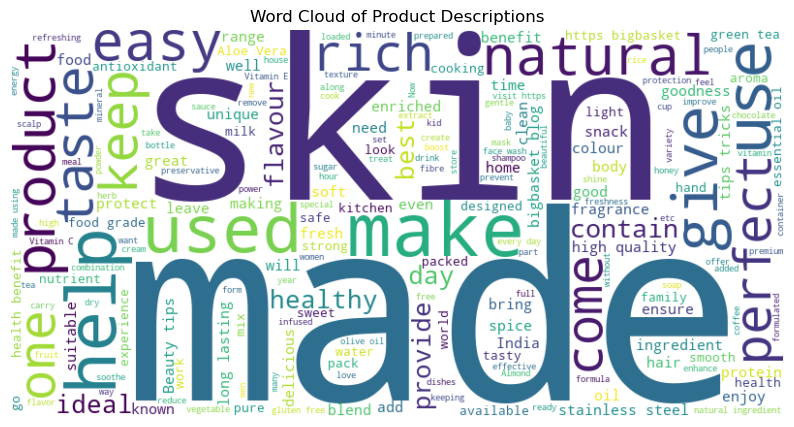

In [21]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Product Descriptions')
plt.axis('off')
plt.show()

In [22]:
# Basic Inventory Management Functionalities
def search_product(product_name):
    """Search for a product in the inventory."""
    result = df[df['product'].str.contains(product_name, case=False)]
    return result

def filter_by_category(category_name):
    """Filter products by category."""
    result = df[df['category'] == category_name]
    return result

def filter_by_price(min_price, max_price):
    """Filter products by price range."""
    result = df[(df['sale_price'] >= min_price) & (df['sale_price'] <= max_price)]
    return result

In [28]:
# Example usage:
search_result = search_product('shirt')
print("Search Result:")
search_result.head()

Search Result:


,product,category,sub_category,brand,sale_price,market_price,type,rating,description
12550,Washing Net Bag - For Bag Shirts/T-Shirts,Cleaning & Household,Bins & Bathroom Ware,KM,-0.336274,-0.177158,"Laundry, Storage Baskets",4.3,KM Washing bag is ideal for placing clothes in...
20513,Baby Care Collection Baby Gift Set - with Orga...,Baby Care,Baby Bath & Hygiene,Johnson's baby,0.056524,-0.055107,Baby Gift Sets,4.4,JOHNSONS baby care collection is an exclusive ...


In [27]:
category_result = filter_by_category('Apparel')
print("\nProducts in the Apparel category:")
category_result.head()


Products in the Apparel category:


,product,category,sub_category,brand,sale_price,market_price,type,rating,description


In [26]:
price_result = filter_by_price(10, 50)  # Example price range: $10 to $50
print("\nProducts in the price range $10 to $50:")
price_result.head()


Products in the price range $10 to $50:


,product,category,sub_category,brand,sale_price,market_price,type,rating,description
935,Stainless Steel Induction Compatible Pressure...,"Kitchen, Garden & Pets",Cookware & Non Stick,Hawkins,10.277514,8.969851,Pressure Cookers,3.94341,The body and lid of this Stainless Steel Press...
1056,"Gas Stove-3 Burner Royale Plus Schott Glass, B...","Kitchen, Garden & Pets",Cookware & Non Stick,Prestige,13.730440,17.728358,Gas Stove,3.94341,Prestige Royale Plus Gas Stove. Add a Touch of...
1381,Deodorant Body Spray - Man Freedom EDT,Beauty & Hygiene,Men's Grooming,Tommy Hilfiger,10.750517,8.883899,Men's Deodorants,3.94341,Tommy HilfigerFreedomis designed for people wh...
1740,Deodorant Body Spray - Be Delicious Woman EDT,Beauty & Hygiene,Fragrances & Deos,Dkny,10.750517,8.883899,Women's Deodorants,3.94341,"This is a bright, fresh and energetic fragranc..."
1766,Good Girl Eau De Parfum For Women,Beauty & Hygiene,Fragrances & Deos,Carolina Herrera,13.033274,12.064123,Eau De Parfum,5.00000,Well behaved girls rarely make history...GOOD ...
